In [182]:
# type your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import cross_val_score,LeaveOneOut,KFold
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV

## Machine learning Model for predicting Houseprice by certain features

## Data Reading & Gathering Information

In [57]:
d=pd.read_csv('C:\\Users\\AVIRAJ\\Downloads\\houseprice.csv')
d.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [58]:
d.drop(['Id'],axis=1,inplace=True)

In [59]:
d.shape

(1460, 80)

In [60]:
d.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Exploratory Data Analysis

In [61]:
d[['PoolQC','Fence','MiscFeature']].isnull().sum()

PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

#### High number of Null values .We drop them too

In [78]:
d.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [79]:
d.isnull().sum().sort_values(ascending=False)

SalePrice       0
YearRemodAdd    0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
               ..
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
MSSubClass      0
Length: 74, dtype: int64

In [81]:
d.isnull().sum().sort_values(ascending=False)

SalePrice       0
YearRemodAdd    0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
               ..
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
MSSubClass      0
Length: 74, dtype: int64

In [65]:
d['PoolArea'].value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [66]:
d.drop(['PoolArea'],axis=1,inplace=True)

In [67]:
d.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Fence            1179
FireplaceQu       690
LotFrontage       259
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
MSSubClass          0
Length: 78, dtype: int64

In [68]:
d.drop(['FireplaceQu'],axis=1,inplace=True)

In [69]:
d.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Fence            1179
LotFrontage       259
GarageType         81
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
MSSubClass          0
Length: 77, dtype: int64

In [70]:
for i in d.columns:
    if d[i].isnull().sum()>0:
        d[i]=d[i].fillna(method='ffill')

In [71]:
d.isnull().sum().sort_values(ascending=False)

PoolQC          197
MiscFeature       5
Fence             5
SalePrice         0
Foundation        0
               ... 
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
MSSubClass        0
Length: 77, dtype: int64

In [72]:
g=0
for i in d.columns:
    if d[i].isnull().sum()==0:
        g=g+1

In [73]:
if g==d.shape[1]:
    print('Same')

#### Hence Null value Treatment Done .Missing Values done

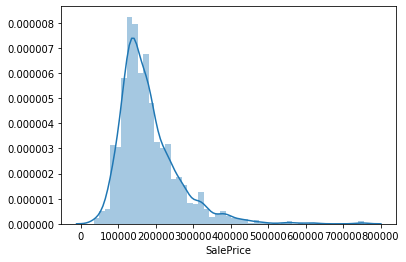

In [74]:
sns.distplot(d['SalePrice'])
plt.show()

In [75]:
d['SalePrice']=d['SalePrice'].apply(lambda x:np.log(x))

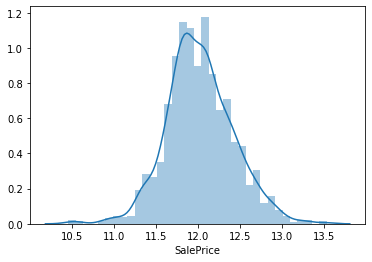

In [76]:
sns.distplot(d['SalePrice'])
plt.show()

#### Normalization of Saleprice-Target Variable done

In [82]:
d.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,12,2008,WD,Normal,12.429216


In [83]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

In [84]:
for i in d.columns:
    if d[i].dtype=='object':
        print(d[i].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1260
Feedr       81
Artery     

In [85]:
d.drop(['MSZoning','Street','LandContour','Utilities','LotConfig','LandSlope','Condition1','Condition2','RoofMatl','BsmtCond','BsmtFinType2','Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive'],axis=1,inplace=True)

### We have dropped the above features as they are highly valued to certain Categories.Hence dont contribute to the model much.

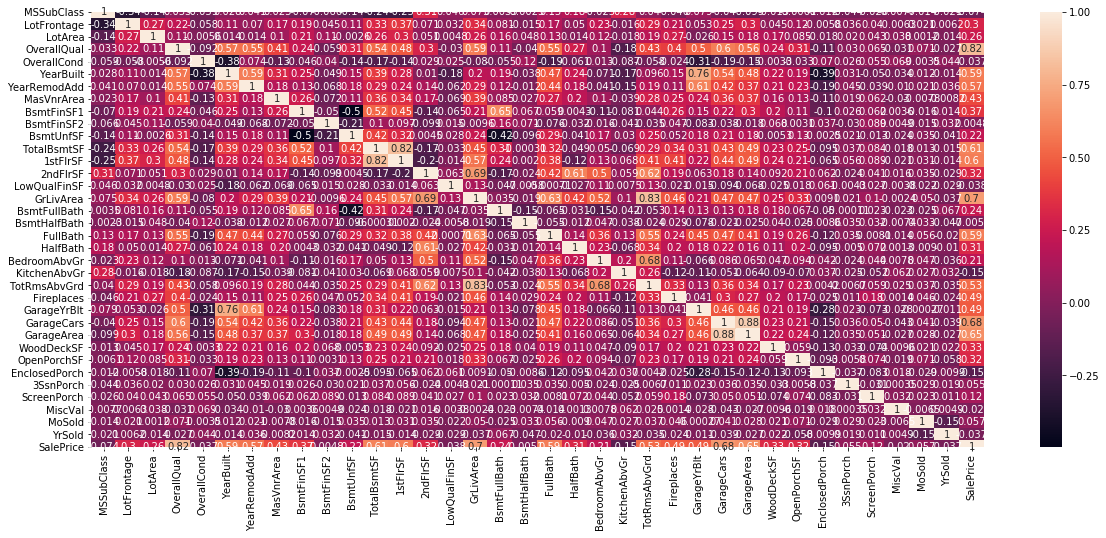

In [87]:
plt.subplots(figsize=(20,8))
sns.heatmap(d.corr(),annot=True)
plt.show()

In [90]:
Num=[]
for i in d.columns:
    if d[i].dtype=='int64' or d[i].dtype=='float64':
        Num.append(i)

        

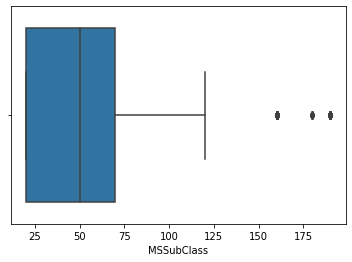

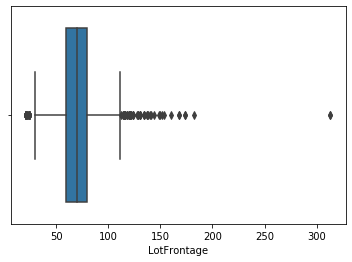

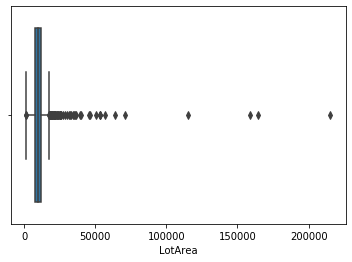

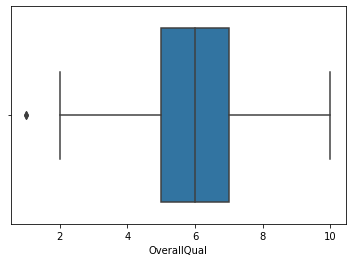

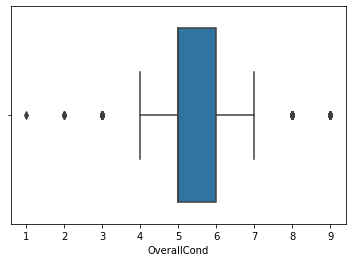

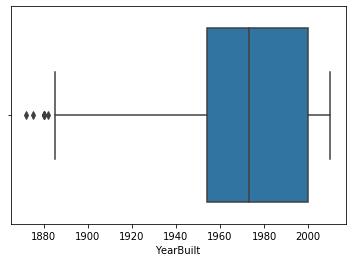

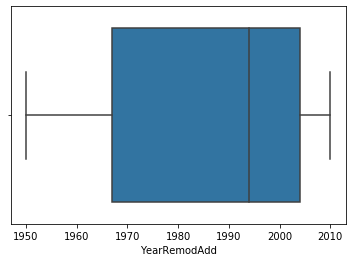

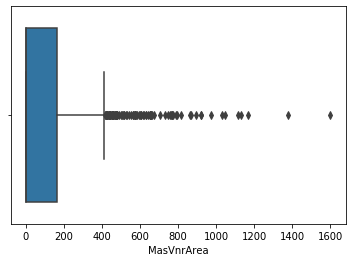

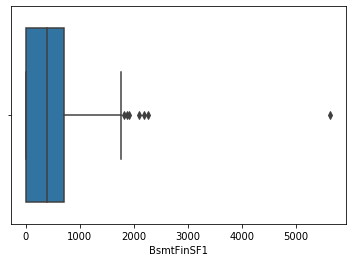

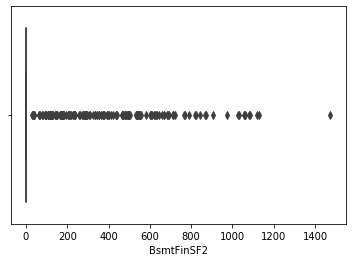

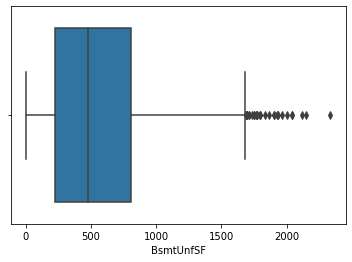

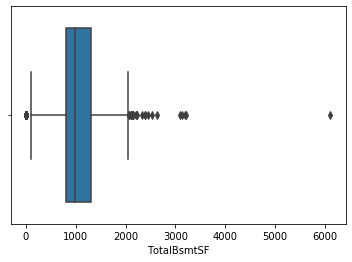

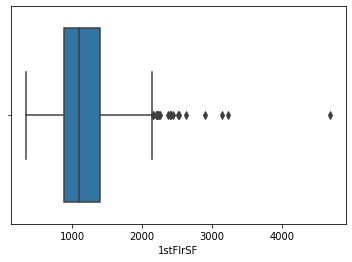

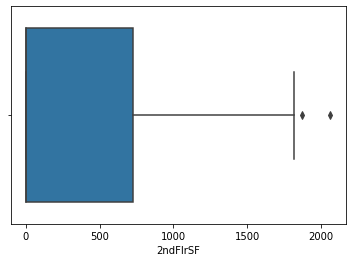

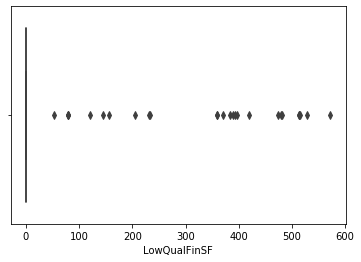

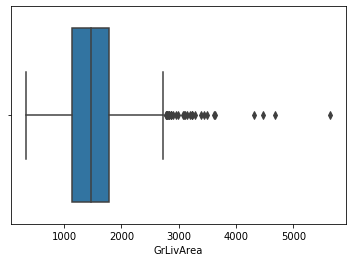

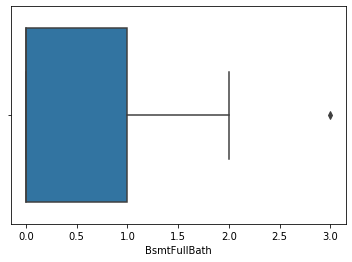

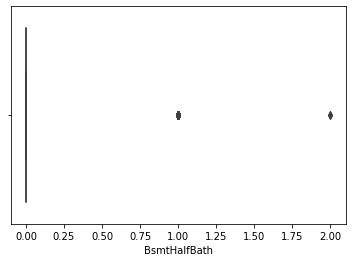

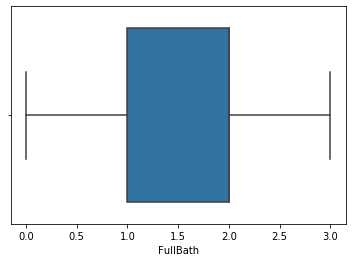

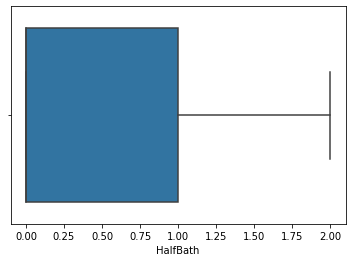

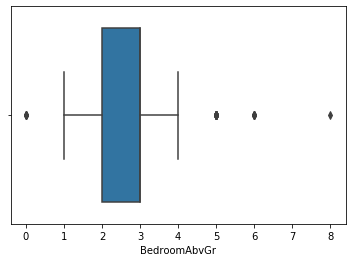

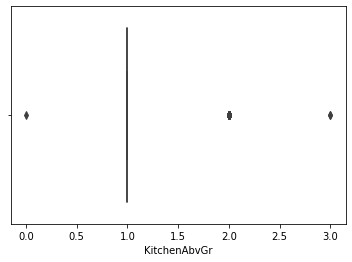

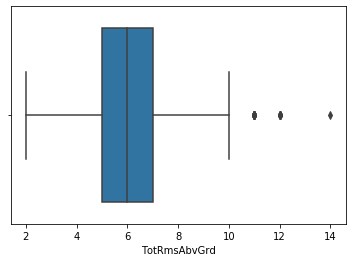

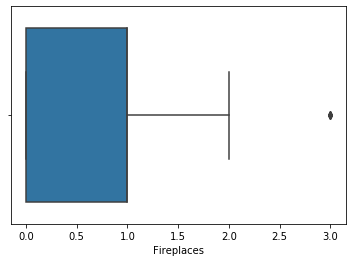

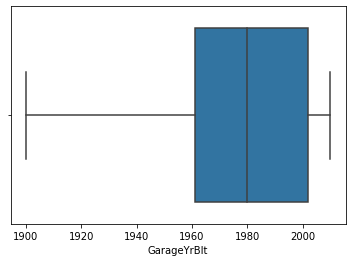

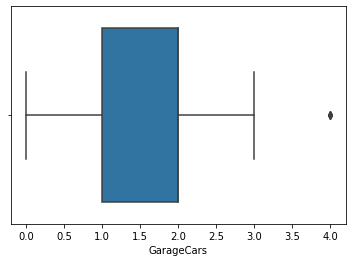

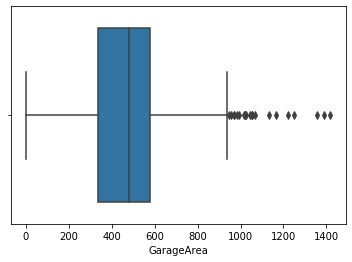

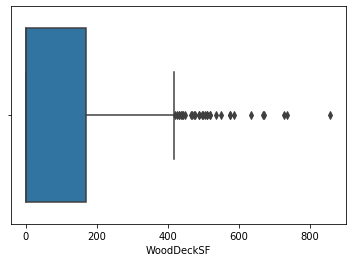

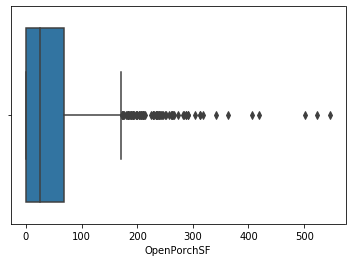

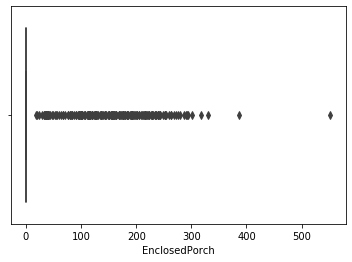

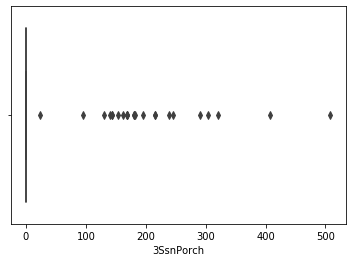

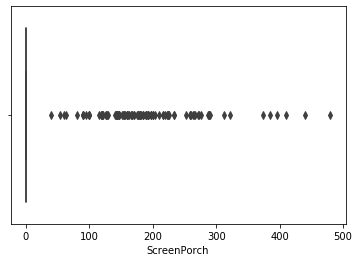

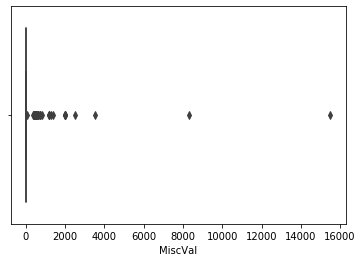

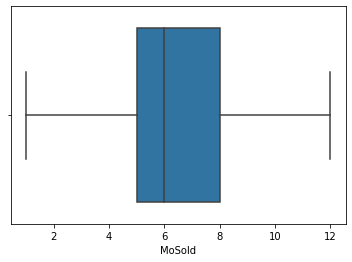

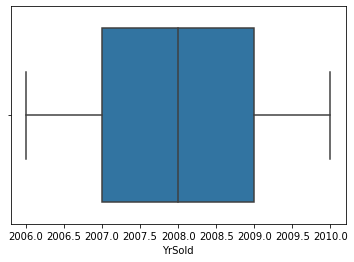

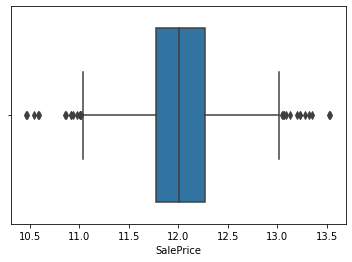

In [92]:
for i in Num:
    sns.boxplot(d[i])
    plt.show()

In [93]:
### These features are having Only Outliers.No IQR.Hence we drop them
d.drop(['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal'],axis=1,inplace=True)

In [94]:
Num=[]
for i in d.columns:
    if d[i].dtype=='int64' or d[i].dtype=='float64':
        Num.append(i)

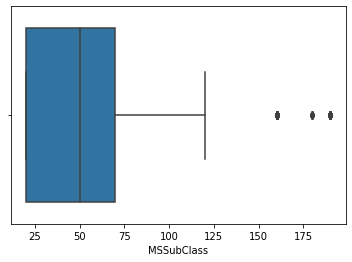

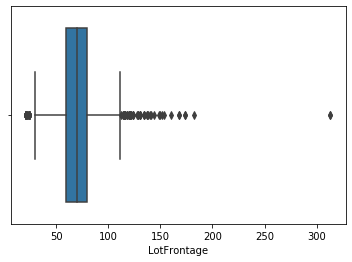

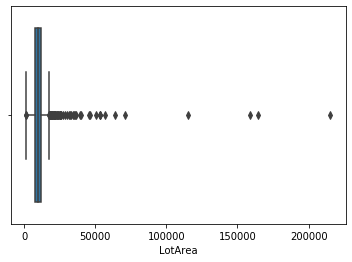

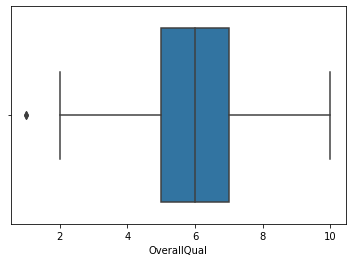

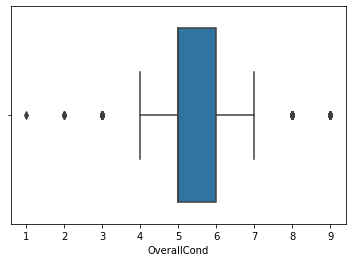

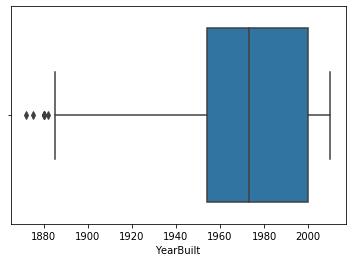

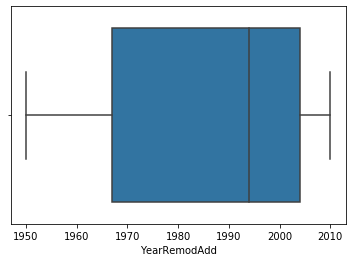

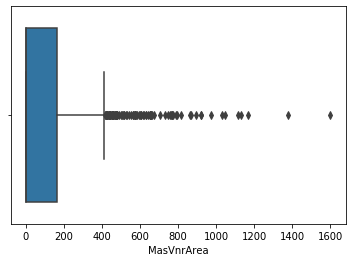

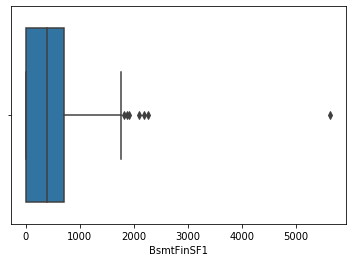

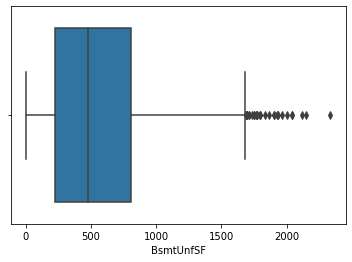

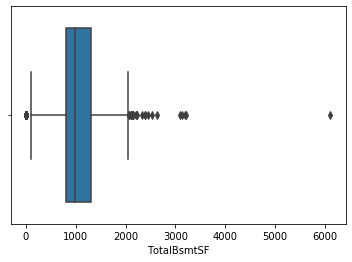

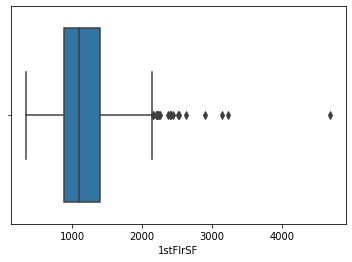

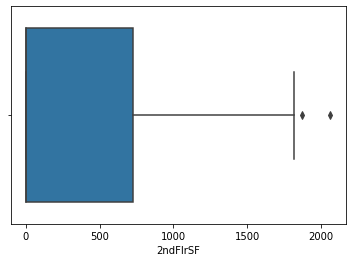

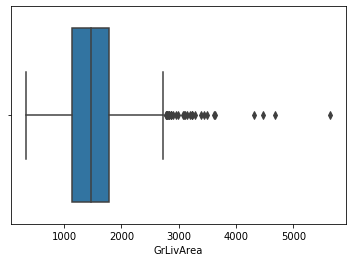

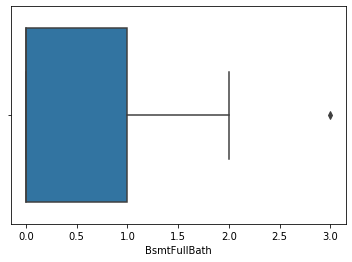

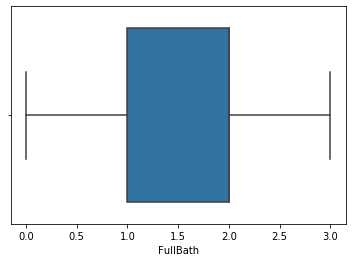

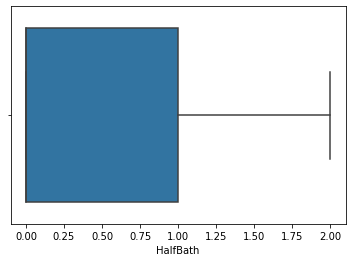

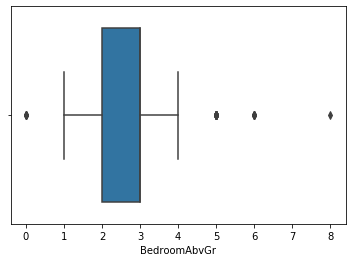

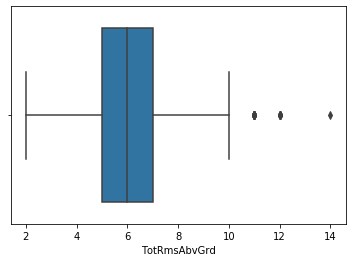

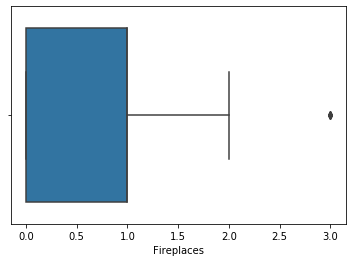

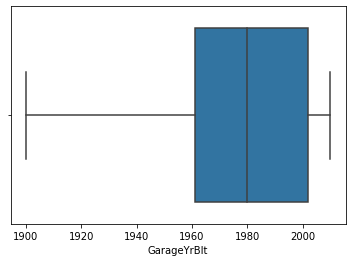

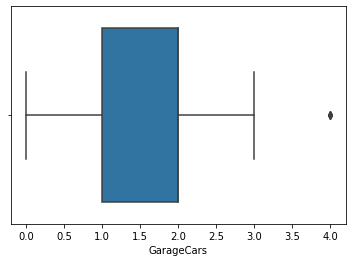

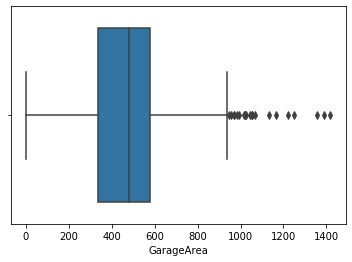

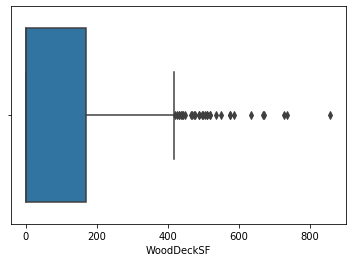

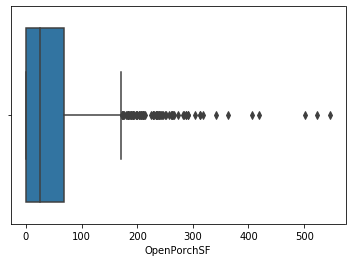

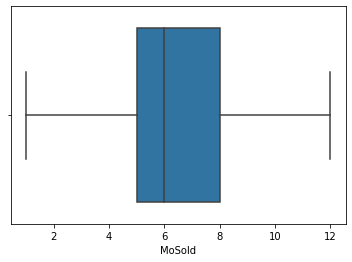

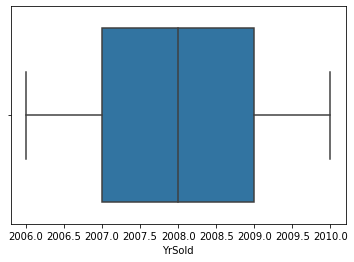

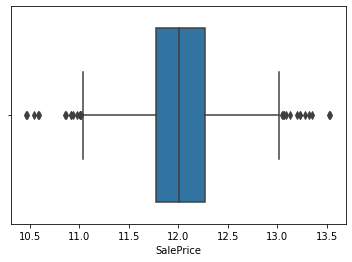

In [95]:
for i in Num:
    sns.boxplot(d[i])
    plt.show()

In [97]:
for i in Num:
    Q1=d[i].quantile(0.25)
    Q3=d[i].quantile(0.75)
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    d=d[(d[i]<UL)&(d[i]>LL)]

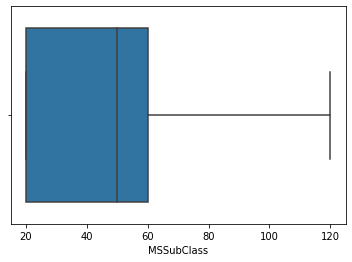

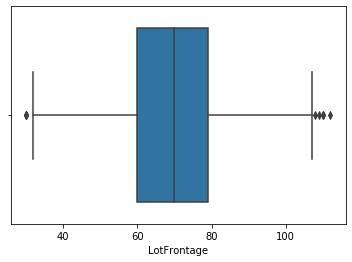

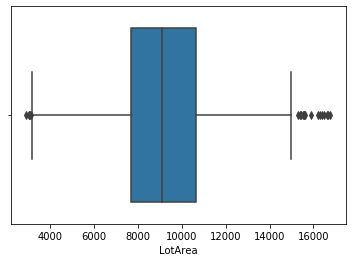

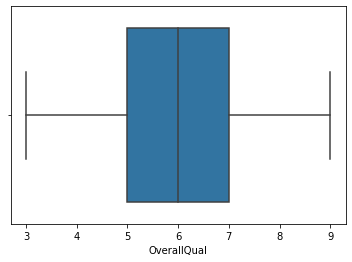

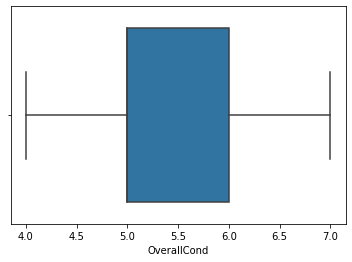

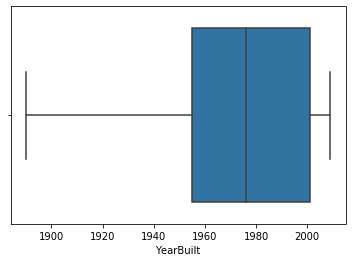

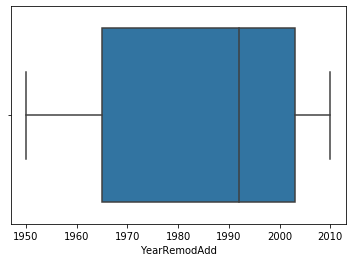

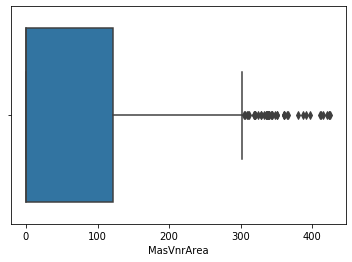

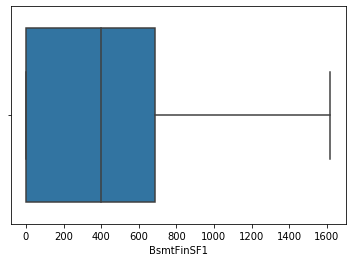

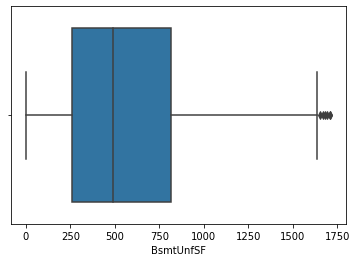

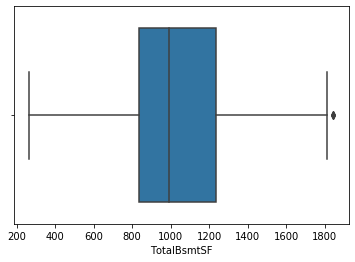

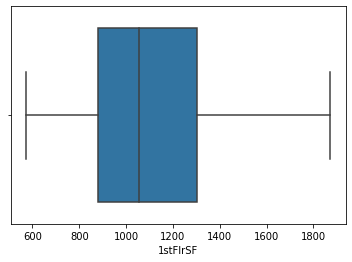

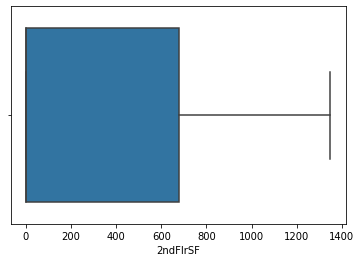

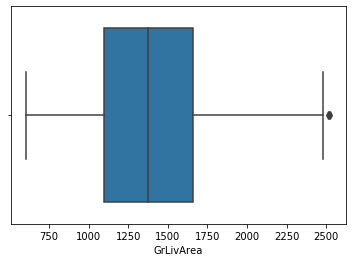

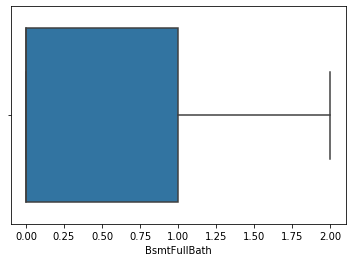

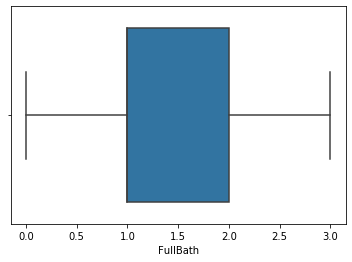

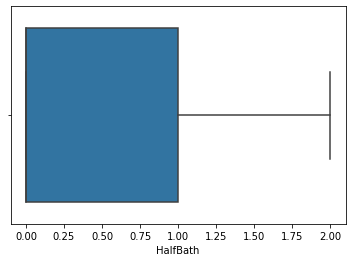

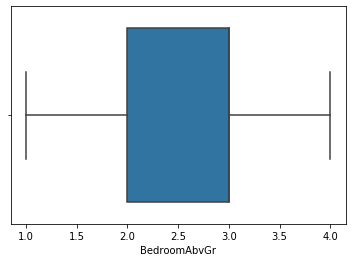

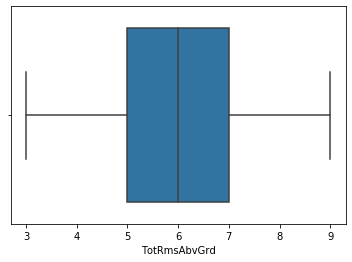

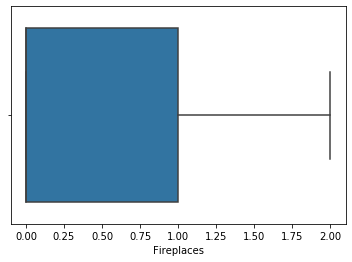

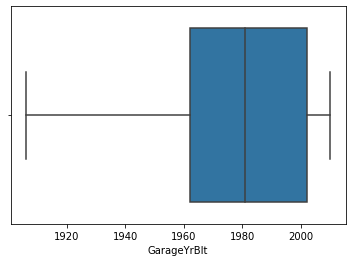

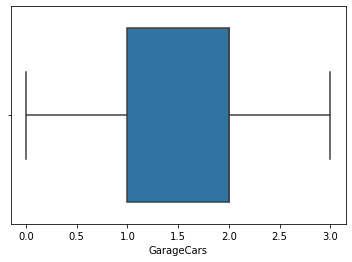

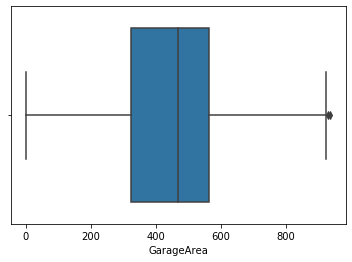

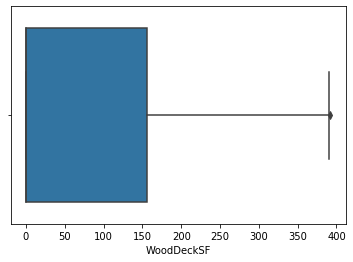

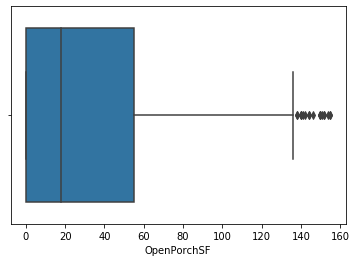

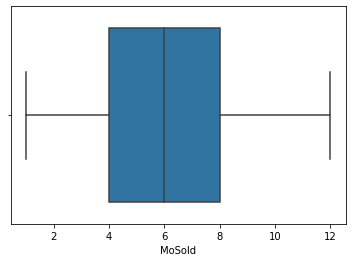

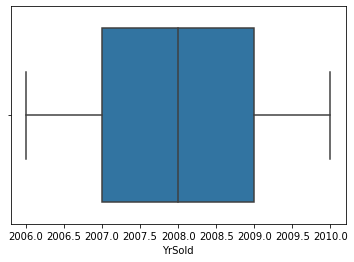

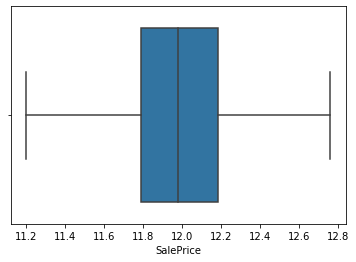

In [98]:
for i in Num:
    sns.boxplot(d[i])
    plt.show()

### We have Successfully Treated the Outliers in the Numerical Features

In [99]:
d.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,65.0,8450,Reg,CollgCr,1Fam,2Story,7,5,2003,...,RFn,2,548,0,61,2,2008,WD,Normal,12.247694
2,60,68.0,11250,IR1,CollgCr,1Fam,2Story,7,5,2001,...,RFn,2,608,0,42,9,2008,WD,Normal,12.317167
3,70,60.0,9550,IR1,Crawfor,1Fam,2Story,7,5,1915,...,Unf,3,642,0,35,2,2006,WD,Abnorml,11.849398
4,60,84.0,14260,IR1,NoRidge,1Fam,2Story,8,5,2000,...,RFn,3,836,192,84,12,2008,WD,Normal,12.429216
5,50,85.0,14115,IR1,Mitchel,1Fam,1.5Fin,5,5,1993,...,Unf,2,480,40,30,10,2009,WD,Normal,11.870600


In [102]:
Cat=[]
for i in d.columns:
    if d[i].dtype=='object':
        Cat.append(i)

In [103]:
Cat

['LotShape',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'GarageType',
 'GarageFinish',
 'SaleType',
 'SaleCondition']

### We do Dummification of the Categorical Features to put in LInear Regression model

In [106]:
d=pd.get_dummies(data=d,columns=Cat)
d.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,150,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,434,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,540,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,490,...,0,0,0,1,0,0,0,0,1,0
5,50,85.0,14115,5,5,1993,1995,0.0,732,64,...,0,0,0,1,0,0,0,0,1,0


## Machine Learning

###  Model Preparation 

In [108]:
x=d.drop(['SalePrice'],axis=1)
y=d['SalePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

#### Statistical test for Sample-Population

In [111]:
stats.ttest_1samp(y_train,np.mean(y))

Ttest_1sampResult(statistic=0.6999956645343339, pvalue=0.48420132492458556)

As p-value>0.05,we reject Null Hypothesis and say that the Sample is from our Population.
Hence the X_train,y_train,Test datas represent our dataset

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf=[vif(x.values,i) for i in range(x.shape[1])]
vf_df=pd.DataFrame({'VIF':vf},index=x.columns)
vf_df

C:\Users\AVIRAJ\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF
MSSubClass,24.120068
LotFrontage,1.844412
LotArea,2.465775
OverallQual,4.626658
OverallCond,2.006898
...,...
SaleCondition_AdjLand,inf
SaleCondition_Alloca,inf
SaleCondition_Family,inf
SaleCondition_Normal,inf


We see the Highest VIF features

In [127]:
h=vf_df[vf_df['VIF']>1000]
h

,VIF
LotShape_IR1,inf
LotShape_IR2,inf
LotShape_IR3,inf
LotShape_Reg,inf
Neighborhood_Blmngtn,inf
...,...
SaleCondition_AdjLand,inf
SaleCondition_Alloca,inf
SaleCondition_Family,inf
SaleCondition_Normal,inf


The above conditions have infinite VIf i.e high multicollinearity

We should drop them to reduce VIF & make model better

In [131]:
p=h.index

In [132]:
d.drop(columns=p,axis=1,inplace=True)

In [133]:
d.shape

(859, 28)

In [134]:
x=d.drop(['SalePrice'],axis=1)
y=d['SalePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf=[vif(x.values,i) for i in range(x.shape[1])]
vf_df=pd.DataFrame({'VIF':vf},index=x.columns)
vf_df

,VIF
MSSubClass,5.756256
LotFrontage,28.704956
LotArea,22.485281
OverallQual,78.464168
OverallCond,75.062260
YearBuilt,26668.321606
YearRemodAdd,24684.858170
MasVnrArea,1.927233
BsmtFinSF1,16.558842
BsmtUnfSF,24.794386


Here we drop the ones with Highest VIF to reduce multicollinearity

In [137]:
u=vf_df[vf_df['VIF']>1000]
q=u.index
q

Index(['YearBuilt', 'YearRemodAdd', '1stFlrSF', 'GrLivArea', 'GarageYrBlt',
       'YrSold'],
      dtype='object')

In [138]:
d.drop(columns=q,axis=1,inplace=True)

In [139]:
d.shape

(859, 22)

In [140]:
x=d.drop(['SalePrice'],axis=1)
y=d['SalePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [141]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf=[vif(x.values,i) for i in range(x.shape[1])]
vf_df=pd.DataFrame({'VIF':vf},index=x.columns)
vf_df

,VIF
MSSubClass,5.167212
LotFrontage,26.538670
LotArea,21.979106
OverallQual,62.713694
OverallCond,31.440777
MasVnrArea,1.815953
BsmtFinSF1,16.399857
BsmtUnfSF,24.535193
TotalBsmtSF,90.624664
2ndFlrSF,7.008199


In [142]:
d.drop(columns=['TotalBsmtSF'],axis=1,inplace=True)

In [143]:
x=d.drop(['SalePrice'],axis=1)
y=d['SalePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [144]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf=[vif(x.values,i) for i in range(x.shape[1])]
vf_df=pd.DataFrame({'VIF':vf},index=x.columns)
vf_df

,VIF
MSSubClass,5.166168
LotFrontage,26.535360
LotArea,21.788893
OverallQual,60.667578
OverallCond,31.385029
MasVnrArea,1.815745
BsmtFinSF1,8.501216
BsmtUnfSF,11.683062
2ndFlrSF,5.432770
BsmtFullBath,2.964045


In [145]:

d.drop(columns=['TotRmsAbvGrd'],axis=1,inplace=True)

In [146]:
x=d.drop(['SalePrice'],axis=1)
y=d['SalePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [147]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf=[vif(x.values,i) for i in range(x.shape[1])]
vf_df=pd.DataFrame({'VIF':vf},index=x.columns)
vf_df

,VIF
MSSubClass,5.100497
LotFrontage,26.362690
LotArea,21.538220
OverallQual,60.165650
OverallCond,29.739392
MasVnrArea,1.815712
BsmtFinSF1,8.348600
BsmtUnfSF,11.020633
2ndFlrSF,4.988159
BsmtFullBath,2.949257


In [148]:

d.drop(columns=['OverallQual'],axis=1,inplace=True)

In [149]:
x=d.drop(['SalePrice'],axis=1)
y=d['SalePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [150]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf=[vif(x.values,i) for i in range(x.shape[1])]
vf_df=pd.DataFrame({'VIF':vf},index=x.columns)
vf_df

,VIF
MSSubClass,4.698072
LotFrontage,26.131689
LotArea,21.447736
OverallCond,25.501663
MasVnrArea,1.811730
BsmtFinSF1,7.909316
BsmtUnfSF,9.590947
2ndFlrSF,4.948398
BsmtFullBath,2.905941
FullBath,19.473700


In [151]:

d.drop(columns=['GarageCars'],axis=1,inplace=True)

In [152]:
x=d.drop(['SalePrice'],axis=1)
y=d['SalePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [153]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf=[vif(x.values,i) for i in range(x.shape[1])]
vf_df=pd.DataFrame({'VIF':vf},index=x.columns)
vf_df

,VIF
MSSubClass,4.613101
LotFrontage,25.951866
LotArea,21.444810
OverallCond,25.492573
MasVnrArea,1.811660
BsmtFinSF1,7.908852
BsmtUnfSF,9.512594
2ndFlrSF,4.944188
BsmtFullBath,2.905517
FullBath,18.770548


In [155]:
vf_df.shape

(17, 1)

### Let us see the parameters to be fitted after reducing Multicollinearity

In [156]:
Xc=sm.add_constant(x)
OLS_model=sm.OLS(y,Xc).fit()
print(OLS_model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     157.4
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          2.41e-247
Time:                        09:44:05   Log-Likelihood:                 444.12
No. Observations:                 859   AIC:                            -852.2
Df Residuals:                     841   BIC:                            -766.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.8655      0.061    179.378   

C:\Users\AVIRAJ\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [164]:
pv= OLS_model.pvalues
pv_df=pd.DataFrame(pv,index=Xc.columns,columns=['pvalues'])
w=pv_df[pv_df['pvalues']>0.05]
w

,pvalues
LotFrontage,0.117407
MasVnrArea,0.111954
MoSold,0.314838


#### These are Insignificant values.We can drop them as per OLS Model

In [165]:
w_index=w.index
w_index

Index(['LotFrontage', 'MasVnrArea', 'MoSold'], dtype='object')

In [166]:
d.drop(columns=w_index,axis=1,inplace=True)

In [167]:
x=d.drop(['SalePrice'],axis=1)
y=d['SalePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [168]:
Xc=sm.add_constant(x)
OLS_model=sm.OLS(y,Xc).fit()
print(OLS_model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     189.7
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          3.33e-249
Time:                        09:50:22   Log-Likelihood:                 440.49
No. Observations:                 859   AIC:                            -851.0
Df Residuals:                     844   BIC:                            -779.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.8877      0.057    190.901   

#### Rsquared value reduced.Model getting better

In [169]:
lr=LinearRegression()
cv=cross_val_score(lr,X_train,y_train,cv=5,scoring='r2')
cv

array([0.73107979, 0.76558642, 0.83917702, 0.73365863, 0.64217724])

In [170]:
folds=KFold(n_splits=5,shuffle=True,random_state=42)
sfs1=sfs(lr,k_features='best',cv=folds,scoring='r2')
sfs1.fit(X_train,y_train)

SequentialFeatureSelector(clone_estimator=True,
                          cv=KFold(n_splits=5, random_state=42, shuffle=True),
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          fixed_features=None, floating=False, forward=True,
                          k_features='best', n_jobs=1, pre_dispatch='2*n_jobs',
                          scoring='r2', verbose=0)

In [173]:
best_cols=sfs1.k_feature_names_
best_cols

('MSSubClass',
 'LotArea',
 'OverallCond',
 'BsmtFinSF1',
 'BsmtUnfSF',
 '2ndFlrSF',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF')

In [176]:
SFS_Score=sfs1.k_score_
print("The Rsquared score from SFS or Forward Selection technique=",SFS_Score)

The Rsquared score from SFS or Forward Selection technique= 0.7431587533014676


### Hence we have found the best Features from SFS technique and Best Rscored value from the above technique

In [178]:
not_useful=[]
for i in d.columns:
    if i not in best_cols:
        not_useful.append(i)

In [179]:
not_useful

['SalePrice']

In [180]:
X_train.shape

(601, 14)

### Hence we see all the features are important

In [183]:
alphas=np.logspace(-3,-1,1000)
lasso_cv=LassoCV(alphas=alphas,cv=5,max_iter=5000,random_state=4)
lasso_cv.fit(X_train,y_train)

LassoCV(alphas=array([0.001     , 0.00100462, 0.00100926, 0.00101393, 0.00101861,
       0.00102332, 0.00102804, 0.00103279, 0.00103757, 0.00104236,
       0.00104718, 0.00105202, 0.00105688, 0.00106176, 0.00106666,
       0.00107159, 0.00107654, 0.00108152, 0.00108652, 0.00109154,
       0.00109658, 0.00110165, 0.00110674, 0.00111185, 0.00111699,
       0.00112215, 0.00112733, 0.00113254, 0.00113777, 0.00114303,
       0.0...
       0.09375015, 0.09418332, 0.09461848, 0.09505566, 0.09549486,
       0.09593608, 0.09637935, 0.09682466, 0.09727203, 0.09772147,
       0.09817298, 0.09862658, 0.09908228, 0.09954008, 0.1       ]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=5000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=4, selection='cyclic', tol=0.0001,
        verbose=False)

In [184]:
lasso_cv.alpha_

0.001

### THis is the best alpha as per Hyperparameter tuning

In [187]:
ridge=Ridge(alpha=lasso_cv.alpha_,max_iter=5000)
ridge.fit(X_train,y_train)


Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [189]:
pd.DataFrame(ridge.coef_,index=x.columns,columns=['Coefficients'])

,Coefficients
MSSubClass,0.000702
LotArea,0.000013
OverallCond,0.025480
BsmtFinSF1,0.000328
BsmtUnfSF,0.000305
2ndFlrSF,0.000139
BsmtFullBath,0.067832
FullBath,0.169849
HalfBath,0.099288
BedroomAbvGr,-0.025681


In [193]:
y_ridge_pred=ridge.predict(X_train)
print(r2_score(y_train,y_ridge_pred))

0.7591948895322325


### Hence finally we get this by Ridge Model 

In [191]:
enet=ElasticNet(alpha=lasso_cv.alpha_,max_iter=5000)
enet.fit(X_train,y_train)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=5000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [192]:
pd.DataFrame(enet.coef_,index=x.columns,columns=['Coefficients'])

,Coefficients
MSSubClass,0.000736
LotArea,0.000013
OverallCond,0.023858
BsmtFinSF1,0.000334
BsmtUnfSF,0.000307
2ndFlrSF,0.000145
BsmtFullBath,0.063426
FullBath,0.163005
HalfBath,0.092833
BedroomAbvGr,-0.023495


In [198]:
y_enet_pred=enet.predict(X_train)
print(r2_score(y_train,y_enet_pred))

0.7590486372446389


### Final value from ElasticNet model

In [195]:
lasso=Lasso(alpha=lasso_cv.alpha_,max_iter=5000)
lasso.fit(X_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [196]:
pd.DataFrame(lasso.coef_,index=x.columns,columns=['Coefficients'])

,Coefficients
MSSubClass,0.000764
LotArea,0.000013
OverallCond,0.022428
BsmtFinSF1,0.000338
BsmtUnfSF,0.000309
2ndFlrSF,0.000150
BsmtFullBath,0.059602
FullBath,0.157751
HalfBath,0.087594
BedroomAbvGr,-0.021469


In [197]:
y_lasso_pred=lasso.predict(X_train)
print(r2_score(y_train,y_lasso_pred))

0.7587051670767857


### Final value from Lasso Model

In [199]:
print(OLS_model.rsquared)

0.7588529766598724


### Final value from OLS Model

## As per Rsquared value, Ridge>ElasticNet>OLS>Lasso for this Model

## Hence ,we can successfully predict the Houseprice using above model

## THE END